In [ ]:
from sympy import *
import sympy as s
import numpy as np
import matplotlib.pyplot as plt
import math as m
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from matplotlib.pyplot import style

style.use('default')

In [ ]:
def f(x):
    return 0.5*x**4 - 4*x**3 + 10*x**2 - 7*x + 2

x0 = np.arange(-1, 5, 0.1) # x범위지정
y0 = f(x0) # y는 f(x)에 x를 대입한 결괏값

# 원함수의 최솟값 min(y0)
# np.where 함수를 이용하여 y가 최솟값이 되는 x의 위치를 찾고, 
# 그 인덱스를 x0 array에 대입하여 값을 가져옴
print(f'f(x)는 x가 {x0[np.where(y0 == min(y0))]}일 때 최솟값 {min(y0)}을 가진다')

미분법을 이용

In [ ]:
x = symbols("x") 
Derivative(0.5*x**4 - 4*x**3 + 10*x**2 - 7*x + 2, x).doit()
# = diff(2 * sin(x) + 0.5*x , x)

In [ ]:
def f(x):
    return 0.5*x**4 - 4*x**3 + 10*x**2 - 7*x + 2
def fp(x):
    return 2*x**3 - 12*x**2 + 20*x - 7

x1 = np.arange(-1, 5, 0.1)
y1 = fp(x1)


print(f'f(x)는 x가 {x0[np.where(y0 == min(y0))]}일 때 최솟값 {min(y0)}을 가진다')

In [ ]:
f, axes = plt.subplots(1, 2)
f.set_size_inches((15, 5))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

axes[0].set_title("f(x)", fontsize = 20) 
axes[0].set_xlabel('x', fontsize = 13)
axes[0].set_ylabel('y', fontsize = 13, rotation = 0)
axes[0].axvline(0.0, color='gray', linestyle="--", alpha=0.5)
axes[0].axhline(0.0, color='gray', linestyle="--", alpha=0.5)
axes[0].plot(x0, y0)
axes[0].grid(True, alpha=0.5, linestyle='--')
axes[0].scatter(x0[np.where(y0 == min(y0))], min(y0), label = "minimum")
axes[0].legend(loc='upper left')

axes[1].set_title("f'(x)", fontsize = 20)
axes[1].set_xlabel('x', fontsize = 13)
axes[1].set_ylabel('y', fontsize = 13, rotation = 0)
axes[1].axvline(0.0, color='gray', linestyle="--", alpha=0.5)
axes[1].axhline(0.0, color='gray', linestyle="--", alpha=0.5)
axes[1].plot(x1, y1)
axes[1].grid(True, alpha=0.5, linestyle='--')

### 1-2) 뉴턴법을 이용 

In [ ]:
x = symbols('x')

f_x = 0.5*x**4 - 4*x**3 + 10*x**2 - 7*x + 2 # 원함수
fp_x = diff(f_x) 

x_init = 4 # 초기값 지정
Tol = 0.001 # 허용오차

x_t = x_init
i = 0

while True: # 오차값이 허용오차 이내일때까지 반복한다
    i = i + 1
    
    # x, f(x)를 지나는 접선의 x절편을 구한다.
    # 함수이름.subs(a, b)는 a에 b를 대입하겠다는 뜻이다
    x_tp1 = float(x_t) - float(f_x.subs(x,x_t))/float(fp_x.subs(x,x_t))
    
    # x값을 접선의 x절편으로 변경한다.
    error = f_x.subs(x, x_tp1) 

    if error <= Tol: # 오차값이 0이라고 해도 될 정도로 작은 값이라면 종료한다(허용오차이내)
        break
    x_t = x_tp1

print(f'반복 횟수: {i}')
print(f'근사해 x = {x_tp1}')
print(f'근사해일 때 최솟값 : {f_x.subs(x,x_tp1)}')

### 1-3) 경사하강법 이용

In [42]:
def f(x):
    return  0.5*x**4 - 4*x**3 + 10*x**2 - 7*x + 2 

def fp(x):
    return 2*x**3 - 12*x**2 + 20*x - 7

In [ ]:
x0 = 4 # 초기값 지정
learning_rate = 0.1 # 학습률 지정 ( 단계마다 x를 이동시켜줄 거리 )
max_iter = 20 # 알고리즘 반복 횟수 지정

In [ ]:
# 알고리즘 구현 및 실행
# 학습률이 작아 그래프의 굴곡을 벗어나지 못한다.
 
print("step \t x \t \t f(x)")
print("{:02d} \t {:6.5f} \t {:6.5f}".format(0, x0, f(x0)))

for i in range(max_iter):
    x1 = x0 - learning_rate * fp(x0)
    x0 = x1
    print("{:02d} \t {:6.5f} \t {:6.5f}".format(i+1, x0, f(x0)))

In [43]:
# 알고리즘 함수화

def gradient_descent(f, fp, x0, learning_rate, max_Iter):
    paths = []   # 비어 있는 list
    
    print("{0:02d} : {1:5.5f}, {2:6.5f}".format(0, x0, f(x0)))
    
    for i in range(max_Iter):
        x1 = x0 - learning_rate * fp(x0) 
        # x를 학습률로 지정한 거리만큼 이동
        print('{0:02d} : {1:5.5f}, {2:6.5f}'.format(i+1, x1, f(x1)))
        
        # x0에 x1의 값을 대입해주며 갱신해주고, 다시 반복
        x0 = x1
        paths.append(x0)   # 최적값을 찾아가는 각 점을 모은 것
    return(x0, f(x0), np.array(paths))

In [49]:
# x_20값이 위에서 구했던 최솟값 -2.84769와 최대한 근사하도록 학습률을 조정해보았다
xopt, fopt, paths = gradient_descent(f, fp, 4, 0.2, 200) 


00 : 4.00000, 6.00000
01 : 2.20000, 4.12080
02 : 2.15680, 4.10793
03 : 2.08070, 4.06769
04 : 1.94505, 3.93901
05 : 1.70115, 3.52651
06 : 1.27275, 2.35481
07 : 0.64480, 0.65815
08 : 0.35621, 0.60265
09 : 0.61782, 0.62183
10 : 0.36829, 0.58772
11 : 0.60067, 0.60155
12 : 0.37723, 0.57782
13 : 0.58836, 0.58839
14 : 0.38425, 0.57069
15 : 0.57891, 0.57910
16 : 0.38999, 0.56530
17 : 0.57132, 0.57217
18 : 0.39482, 0.56105
19 : 0.56504, 0.56679
20 : 0.39897, 0.55762
21 : 0.55971, 0.56248
22 : 0.40259, 0.55479
23 : 0.55512, 0.55896
24 : 0.40580, 0.55240
25 : 0.55109, 0.55603
26 : 0.40866, 0.55036
27 : 0.54753, 0.55354
28 : 0.41125, 0.54860
29 : 0.54433, 0.55141
30 : 0.41360, 0.54707
31 : 0.54145, 0.54956
32 : 0.41576, 0.54572
33 : 0.53883, 0.54795
34 : 0.41774, 0.54452
35 : 0.53643, 0.54652
36 : 0.41958, 0.54345
37 : 0.53423, 0.54525
38 : 0.42129, 0.54248
39 : 0.53219, 0.54412
40 : 0.42288, 0.54161
41 : 0.53029, 0.54310
42 : 0.42438, 0.54082
43 : 0.52853, 0.54218
44 : 0.42578, 0.54010
45 : 0.526

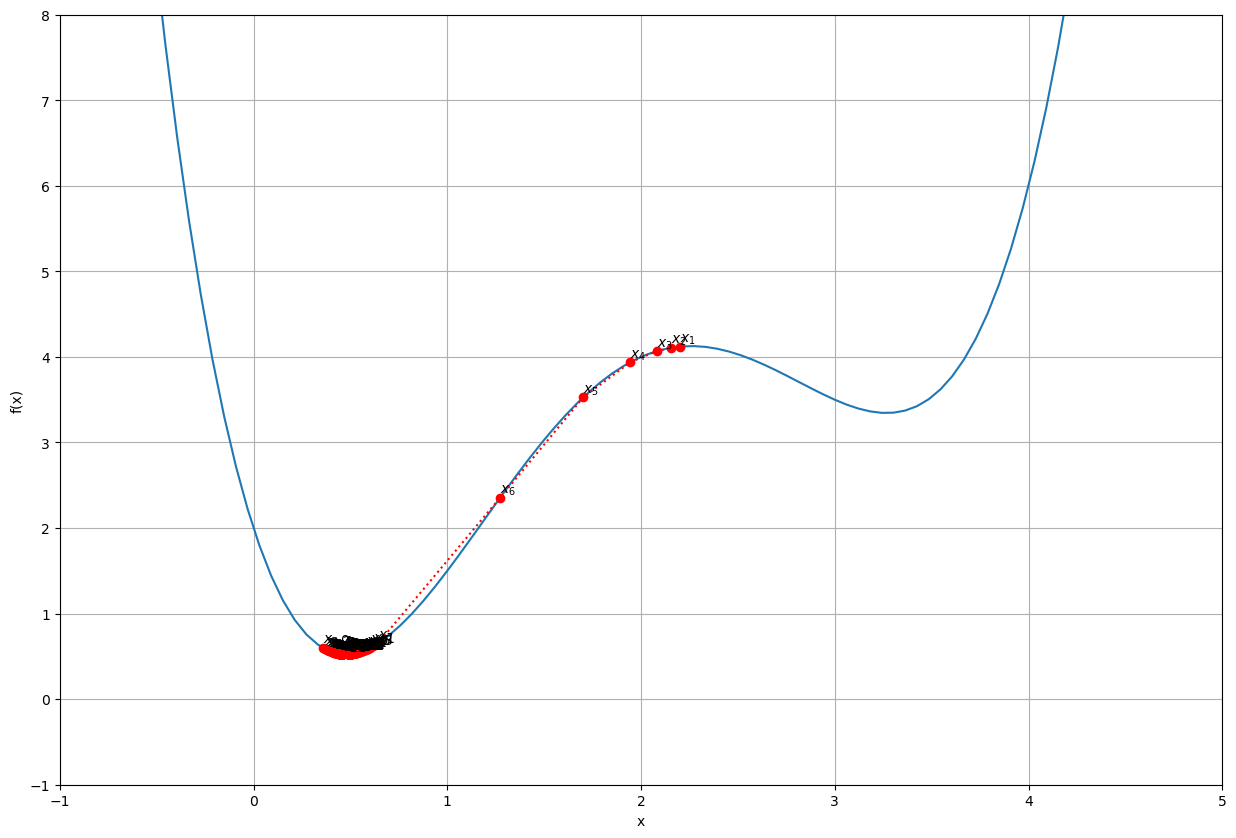

In [50]:
x = np.linspace(-1, 5, 100)
y = f(x)

plt.figure(figsize=(15, 10))
plt.plot(x, f(x))

plt.plot(paths, f(paths), 'ro:')

for k, point in enumerate(paths):
    plt.text(point, f(point), '$x_{0}$'.format(k+1), verticalalignment='bottom')

plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(-1, 5)
plt.ylim(-1.0, 8.0)
plt.show()

In [ ]:
def f1(x):
    return 0.5*x**4 - 4*x**3 + 10*x**2 - 7*x + 2 

def f1d(x):
    return 2*x**3 - 12*x**2 + 20*x - 7

xx = np.linspace(-1, 5, 100)
plt.figure(figsize=(20,10))
plt.plot(xx, f1(xx), 'k-')
plt.plot(xx, f1(xx))

# step size
mu = 0.1

# 초기값 지정
x = 4.5

for i in range(5):
    x = x - mu * f1d(x)
    plt.plot(x, f1(x), 'ro', markersize=7)
    #plt.text(x - 0.2, f1(x) + 0.4, "2차 시도")
    plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'r--')
    print(i+1, "차 시도: x_2 = {:.5f}, g_2 = {:.5f}".format(x, f1d(x)))
    
plt.xlabel("x")
plt.ylabel("$f_1(x)$")
plt.title("최대경사법을 사용한 1차함수의 최적화")
plt.ylim(-4,10)
plt.show()